In [ ]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt 
from matplotlib import colors 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

file = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
data_df = pd.read_csv(io.BytesIO(file['insurance.csv']))
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data source: https://www.kaggle.com/mirichoi0218/insurance

In [ ]:
# Check if the dataset has any null value. Turns out that there is no null value 
data_df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

Sex, smoker, region are categorical data.

Age, bmi, children are numeric variables.

Insruance charges is the response variable y 

In [ ]:
# Dimension of the data
data_df.shape

(1338, 7)

 # Statement of the research problems and summary of methods:  (PENDING)



# Exploratory analysis

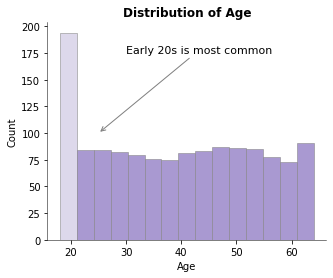

In [ ]:
# Age  
fig, ax = plt.subplots(figsize=(5,4))  # make one subplot (ax) on the figure
n,bins,patches=ax.hist(data_df['age'],bins=15,color="#a999d1")
ax.set_title("Distribution of Age",fontweight="bold")
ax.set_xlabel("Age")
ax.set_ylabel("Count")
for i, rect in enumerate(patches):
    if i == 0:
        rect.set_color('#ddd8eb')
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')

# Add annotation: 
ax.annotate('Early 20s is most common', xy=(25, 100), xytext=(30, 175),
            arrowprops=dict(color='grey',arrowstyle='->'), fontsize=11)
        
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
plt.show()

From the age histrogram, we can see that people in this dataset are in their 20s to 60s. Most of the people are in their 20s 

In [ ]:
# Gender 1 is male, 0 is female 
data_df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Roughly 50% male and 50% female.

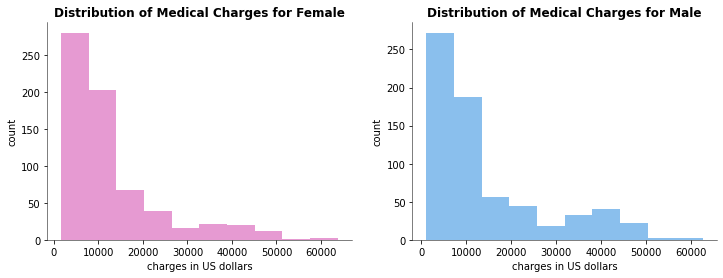

In [ ]:
# Split the dataframe by gender 
female_df=data_df[data_df['sex']=='female'] # 662 rows for female 
male_df=data_df[data_df['sex']=='male']  # 676 rows for male 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axes[0].hist(female_df['charges'],color='#e69ad2')
axes[0].set_title('Distribution of Medical Charges for Female',fontweight="bold")
axes[0].set_xlabel('charges in US dollars')
axes[0].set_ylabel('count')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_linewidth(.5)
axes[0].spines['bottom'].set_linewidth(.5)


axes[1].hist(male_df['charges'],color='#8abfed')
axes[1].set_title('Distribution of Medical Charges for Male',fontweight="bold")
axes[1].set_xlabel('charges in US dollars')
axes[1].set_ylabel('count')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_linewidth(.5)
axes[1].spines['bottom'].set_linewidth(.5)
plt.show()


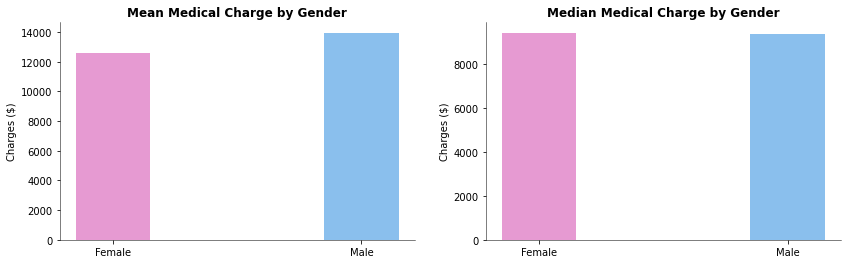

Average insurance charges for female is $12569.58, for male is $13956.75
Median insurance charges for female is $9412.96, for male is $9369.62


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,4))

mean_charge=[female_df['charges'].mean(),male_df['charges'].mean()]
axes[0].bar(np.arange(2),mean_charge,color=("#e69ad2",'#8abfed'),width=0.3)
axes[0].set_title("Mean Medical Charge by Gender",fontweight="bold")
axes[0].set_ylabel("Charges ($)")
axes[0].set_xticks(np.arange(2))
axes[0].set_xticklabels(['Female','Male'])
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_linewidth(.5)
axes[0].spines['bottom'].set_linewidth(.5)

median_charge=[female_df['charges'].median(),male_df['charges'].median()]
axes[1].bar(np.arange(2),median_charge,color=("#e69ad2",'#8abfed'),width=0.3)
axes[1].set_title("Median Medical Charge by Gender",fontweight="bold")
axes[1].set_ylabel("Charges ($)")
axes[1].set_xticks(np.arange(2))
axes[1].set_xticklabels(['Female','Male'])
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_linewidth(.5)
axes[1].spines['bottom'].set_linewidth(.5)
plt.show()

print(f"Average insurance charges for female is ${round(female_df['charges'].mean(),2)}, for male is ${round(male_df['charges'].mean(),2)}")

print(f"Median insurance charges for female is ${round(female_df['charges'].median(),2)}, for male is ${round(male_df['charges'].median(),2)}")



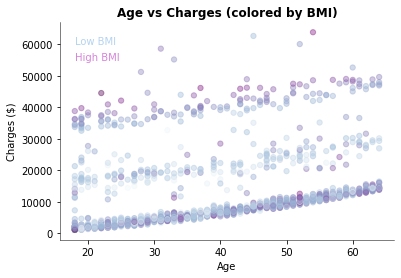

In [ ]:
# Explore the relationship between age and charges, color by bmi
fig, ax = plt.subplots(figsize=(6,4))
smoker_binary=data_df.copy()
cmap = plt.get_cmap('BuPu')
norm = colors.Normalize(data_df['bmi'].min(), data_df['bmi'].max()) 
ycolors = cmap(norm(data_df['bmi']))
ax.scatter(data_df['age'], data_df['charges'], c=ycolors, s=28, alpha=.4)
ax.set_title("Age vs Charges (colored by BMI)",fontweight="bold")
ax.set_xlabel("Age")
ax.set_ylabel("Charges ($)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

ax.text(18,55000,'High BMI',color='#d784db')
ax.text(18,60000,'Low BMI',color='#b4d3f0')
plt.show()


In [ ]:
# smoking 
data_df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Most people in this dataset do not smoke.

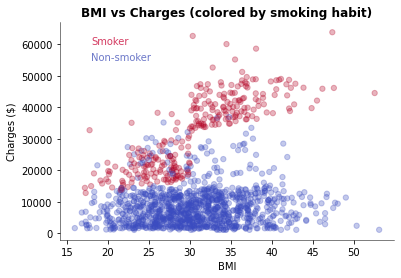

In [ ]:
# Explore the relationship between bmi and charges, colored by smoking or not, red color means smoking yes
smoker_binary_df=data_df.copy()
smoker_binary_df['smoker_binary']=np.where(smoker_binary_df['smoker']=='yes',1,0)

fig, ax = plt.subplots(figsize=(6,4))
cmap = plt.get_cmap('coolwarm')
norm = colors.Normalize(smoker_binary_df['smoker_binary'].min(), smoker_binary_df['smoker_binary'].max()) 
ycolors = cmap(norm(smoker_binary_df['smoker_binary']))
ax.scatter(data_df['bmi'], data_df['charges'], c=ycolors, s=28, alpha=.3)
ax.set_title("BMI vs Charges (colored by smoking habit)",fontweight="bold")
ax.set_xlabel("BMI")
ax.set_ylabel("Charges ($)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

ax.text(18,55000,'Non-smoker',color='#6d79c9')
ax.text(18,60000,'Smoker',color='#d43b61')
plt.show()

In [ ]:
# Region
data_df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
# children
data_df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Most people in this dataset have no children. That match the fact that most people are in their 20s in this dataset.

# Check multi-collinearity

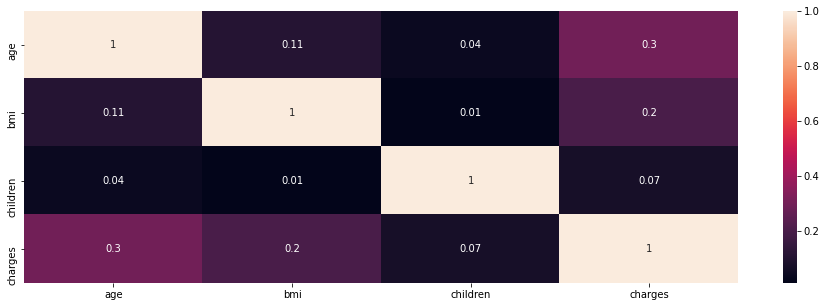

In [ ]:
import seaborn as sns
correlation_matrix = data_df.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

From the correlation heatmap, we can see that most of the variables are not strongly correlated, which is good for modeling using linear regression model.

In [ ]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('charges~ age+ C(sex) + bmi+ children + C(smoker) + C(region)', data=data_df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,35.527488,Intercept
1,1.008900,C(sex)[T.male]
2,1.012074,C(smoker)[T.yes]
3,1.518823,C(region)[T.northwest]
4,1.652230,C(region)[T.southeast]
5,1.529411,C(region)[T.southwest]
6,1.016822,age
7,1.106630,bmi
8,1.004011,children


From the VIF table, we can conclude that none of the predictor variable is causing multi-collinearity issue. As we can see from the VIF table all of the predictors have VIF less than 1.65 and this result matches what the correlation heatmap showed above. VIF score for a predictor variable measures how much the variance is inflated in the coefficient estimates caused by that predictor variables. When VIF score for the predictor variable is between 1 and 10, then that variable is not causing multi-collinearity issue, but when the VIF score is larger than 10, then that variable is causing serious multi-collinearity issue. 

Fit the initial model (include all the predictor variables)

In [ ]:
model_initial =smf.ols('charges~ age+ C(sex) + bmi+ children + C(smoker) + C(region)', data=data_df).fit()
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:38:52   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
C(sex)[T.male]          -131.3144    332.945     -0.394      0.693    -784.470     521.842
C(smoker)[T.yes]        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
C(region)[T.northwest]  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
C(region)[T.southeast] -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
C(region)[T.southwest]  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
age                      256.8564     11.899     21.587      0.000     233.514     280.199
bmi                      339.1935     28.599     11.860      0.000     283.088     395.298
children                 475.5005    137.804      3.451      0.001     205.163     745.838
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary table of the initail fitted model with all the predictors included the Adj. R-squared is 0.749. Sex is not significant with P-value of 	0.693. Other predictors seems significant from the results of t-test and p-value. There is non normality with Prob(JB) of 7.86e-157, but by central limit theorem since the data set is large we can say that the data is approxiamtely normally distributed.  

# Detect Influential Points

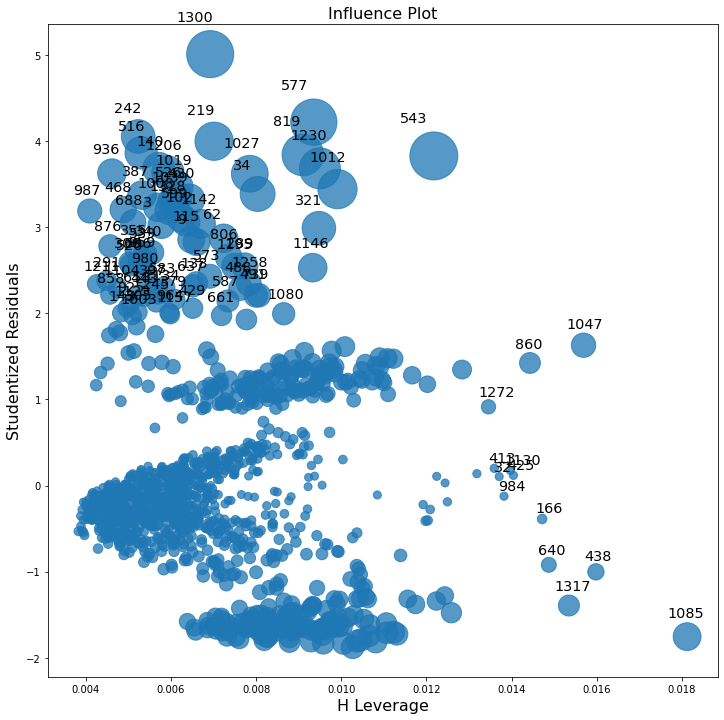

In [ ]:
# Use cook's distance to detect influential points
fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(model_initial,ax=ax, criterion="cooks") 

From the leverage vs. external studentidzed residuals plots, we can see that datapoints with index 1047, 438, 1317 and 1085 are high leverage points, the datapoint with index 543 has the largest Cook's distance, datapoints with index 1300 has the largest studentized residual. 

#### Use externally studentized residual to detect influential points

In [ ]:
# Calculate the external studentized residuals 
infl1 = model_initial.get_influence()
ext_stu_residuals = infl1.resid_studentized_external

import scipy 
n= len(data_df)
p = 9 # We have 9 parameters 

# Threshold value for externally studentized residual
seuil_stud = scipy.stats.t.ppf(0.975, df= n-p-1)

# Identify the potentialinfluential points 
influential= np.abs(ext_stu_residuals) > seuil_stud 

data_df["Original_residuals"] = model_initial.resid
data_df["Externally_studentized_residuals"] = infl1.resid_studentized_external

# Get the datapoints whose might be influential points (filter on the original dataframe)
influential_df=data_df[influential]

# Get the obeservation numbers. externally studentized residual values and original residual values from the fitteed model of the influential points
influential_df[['Externally_studentized_residuals','Original_residuals']]
len(influential_df[['Externally_studentized_residuals','Original_residuals']])

74

In [ ]:
len(data_df)

1338

There are 71 datapoints out of 1338 data points identified as influential points using externally studentized residual methods. 

#### Use Cook's distance to detect influential points

In [ ]:
inflsum = infl1.summary_frame()
reg_cook = inflsum.cooks_d
# Identify the points that might be influential according to Cook's distance 
influential_cook = np.abs(reg_cook) >= 4/n
# Add the cooks distance for all the data points in the original dataframe
data_df["Cook's distance"]=reg_cook
# Filter the dataframe to show the potential influential points according to Cook's distance
influential_cook_df=data_df[influential_cook]
influential_cook_df[["Cook's distance"]]

,Cook's distance
3,0.005871
9,0.005871
34,0.010236
62,0.006641
69,0.002991
...,...
1306,0.003067
1307,0.003160
1314,0.002992
1317,0.003358


There are 109 datapoints out of 1338 data points identified as influential points using Cook's distance method . 

Now we want to find the intersection of influential points list identified by both externally studentized residual and Cook's distance methods. We will use the intersection to be our final list of influential points which will be removed from the original dataset.

In [ ]:
# Indexes of influential points based on externally studentized residuals 
influ_index_1=set(influential_df.index)
# Indexes of influential points based on Cook's distance  
influ_index_2=set(influential_cook_df.index)
# Get the intersection of two lists from above, which is our list of influential points detected
final_influ_point_list =list(influ_index_1.intersection(influ_index_2))
len(final_influ_point_list)

60

In [ ]:
# Drop the 52 influential points identified from the original dataset
updated_df = data_df.drop(final_influ_point_list)
updated_df.head()

,age,sex,bmi,children,smoker,region,charges,Original_residuals,Externally_studentized_residuals,Cook's distance
0,19,female,27.90,0,yes,southwest,16884.9240,-8408.789028,-1.394131,2.036061e-03
1,18,male,33.77,1,no,southeast,1725.5523,-1723.050534,-0.284917,4.975373e-05
2,28,male,33.00,3,no,southeast,4449.4620,-2257.526491,-0.373452,9.785460e-05
4,32,male,28.88,0,no,northwest,3866.8552,-1725.638186,-0.285261,4.455743e-05
5,31,female,25.74,0,no,southeast,3756.6216,36.795801,0.006085,2.327392e-08


In [ ]:
# Fit the model again after removing the influential points 
model_2 =smf.ols('charges~ age+ C(sex) + bmi+ children + C(smoker) + C(region)', data=updated_df).fit()
model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     801.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:38:57   Log-Likelihood:                -12613.
No. Observations:                1278   AIC:                         2.524e+04
Df Residuals:                    1269   BIC:                         2.529e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.299e+04    783.185    -16.582      0.000   -1.45e+04   -1.15e+04
C(sex)[T.male]            97.4030    263.872      0.369      0.712    -420.271     615.076
C(smoker)[T.yes]        2.393e+04    326.516     73.299      0.000    2.33e+04    2.46e+04
C(region)[T.northwest]  -622.9066    378.497     -1.646      0.100   -1365.455     119.642
C(region)[T.southeast] -1055.7324    380.073     -2.778      0.006   -1801.372    -310.093
C(region)[T.southwest]  -770.7206    377.542     -2.041      0.041   -1511.395     -30.046
age                      253.6273      9.459     26.812      0.000     235.069     272.185
bmi                      348.9254     22.682     15.383      0.000     304.426     393.424
children                 410.8806    108.843      3.775      0.000     197.349     624.412
==============================================================================
Omnibus:                       24.910   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.470
Skew:                           0.268   Prob(JB):                     3.99e-07
Kurtosis:                       3.515   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the latest summary table so far, we can see that just by removing the influential points, the adjusted R squared increased to 82.4% from 74.9% originally. 

# Test for heteroscedasticity 

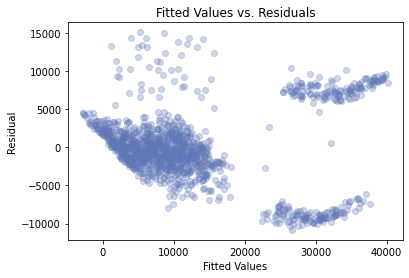

In [ ]:
p = model_2.fittedvalues
res = model_2.resid
plt.scatter(p,res,color='#6178b8',alpha=0.3)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.title('Fitted Values vs. Residuals')
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2, color='grey')

From the residual vs. fitted value plot above, we can see a strong pattern existing. To put it in other words, the bandwidth of the plot around the 0 horizontal line (residual =0) varies a lot for different datapoints. The inconsistent bandwidth suggests the residuals do not have constant variance. The model has heteroscedasticity issue.

In [ ]:
# Breusch-Pagan for heteroscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model_2.resid, model_2.model.exog)   # exog: the regressors, Xs in the model. 
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 593.1874344189849, 'LM-Test p-value': 6.818989427218016e-123}


Because p-value is less than 0.05, we reject null hypothesis in Breusch-Pagan test. So there is significant heteroscedasticity existing.

In [ ]:
# Apply natual log transformation on y 
updated_df.head()
updated_df['log_charges']=np.log(updated_df['charges'])

In [ ]:
updated_df.head()

,age,sex,bmi,children,smoker,region,charges,Original_residuals,Externally_studentized_residuals,Cook's distance,log_charges
0,19,female,27.90,0,yes,southwest,16884.9240,-8408.789028,-1.394131,2.036061e-03,9.734176
1,18,male,33.77,1,no,southeast,1725.5523,-1723.050534,-0.284917,4.975373e-05,7.453302
2,28,male,33.00,3,no,southeast,4449.4620,-2257.526491,-0.373452,9.785460e-05,8.400538
4,32,male,28.88,0,no,northwest,3866.8552,-1725.638186,-0.285261,4.455743e-05,8.260197
5,31,female,25.74,0,no,southeast,3756.6216,36.795801,0.006085,2.327392e-08,8.231275


In [ ]:
# Fit the model again after natual log transformation on Y.   # Note that C() is not needed if the categorical variable is "true" categorical variable
model_3 =smf.ols('log_charges~ age+ C(sex) + bmi+ children + C(smoker) + C(region)', data=updated_df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     874.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:38:58   Log-Likelihood:                -483.90
No. Observations:                1278   AIC:                             985.8
Df Residuals:                    1269   BIC:                             1032.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.8629      0.059    115.967      0.000       6.747       6.979
C(sex)[T.male]            -0.0653      0.020     -3.277      0.001      -0.104      -0.026
C(smoker)[T.yes]           1.6018      0.025     64.924      0.000       1.553       1.650
C(region)[T.northwest]    -0.0811      0.029     -2.835      0.005      -0.137      -0.025
C(region)[T.southeast]    -0.1612      0.029     -5.614      0.000      -0.218      -0.105
C(region)[T.southwest]    -0.1144      0.029     -4.011      0.000      -0.170      -0.058
age                        0.0356      0.001     49.786      0.000       0.034       0.037
bmi                        0.0155      0.002      9.042      0.000       0.012       0.019
children                   0.0974      0.008     11.846      0.000       0.081       0.114
==============================================================================
Omnibus:                      322.059   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1152.124
Skew:                           1.194   Prob(JB):                    6.60e-251
Kurtosis:                       6.992   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model_3.resid, model_3.model.exog)   # exog: the regressors, Xs in the model. 
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 129.80132155083822, 'LM-Test p-value': 3.1104422551941013e-24}


We run Breusch-Pagan test after doing natural log transformation on Y response variable. Because p-value from the test is less than 0.05, we reject null hypothesis in Breusch-Pagan test. So there is still heteroscedasticity issue existing. But we choose to proceed as it is for now and will discuss the impact of heteroscedasticity on the model inference later.

# Normality Check 

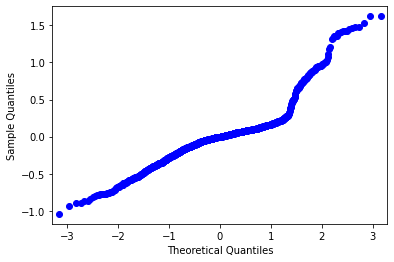

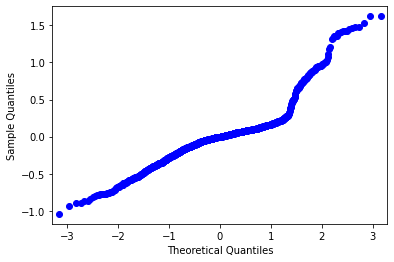

In [ ]:
#QQ plot
sm.qqplot(model_3.resid)

From the QQ plot is plotting the relationship between expected residual value versus the sample residual values. If the residual of the model are normally distributed, the points on the plot should roughly form a straight diagonal line. From this QQ plot we just drew above, it does not show a straigh diagonal line, we think the residual might violate the normal assumption. Next we want to check JB test get the mathematicall result. 

From the model3 summary table, we can see that the JB test statistics is 1152.124 and the p-value for JB test is 6.60e-251. We reject the null hypothesis of JB test which is residuals of the model follow normal distribution. So the conclusion is that the residuals of the model does not follow normal distribution, which matches the fact that QQ plot does not show a straight diagonal line. 

Even both JB test and QQ plots imply non-normality of the residuals, it does not cause much trouble on our model fitting. Since our number of sample is very large (definitely larger than 30), Central Limit Theorem makes sure that the coeffecient estimator follows approximate normal distribution (so that we can still make inference on the coeffecient estimator). 

# Check linearity 

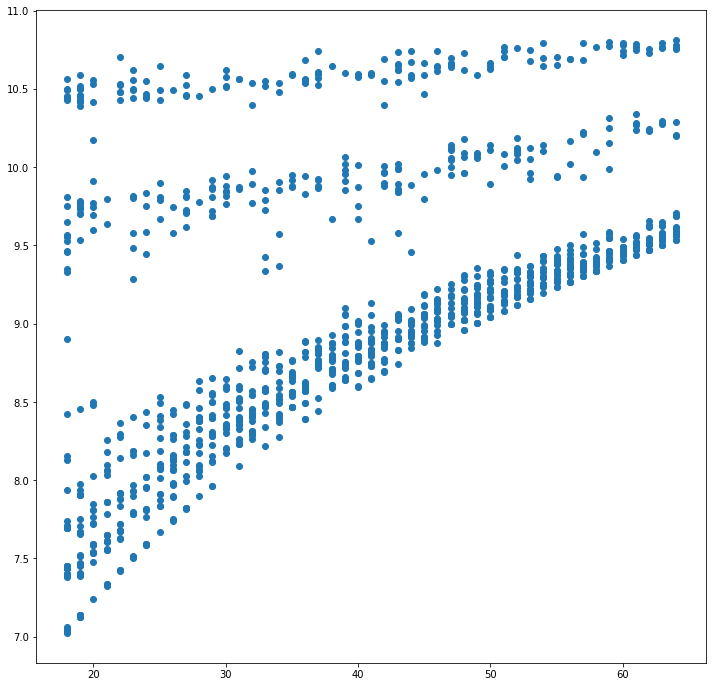

In [ ]:
# predictor age with y 
fig, ax = plt.subplots(figsize=(12,12))
y = updated_df['log_charges']
x1= updated_df['age']
ax.scatter(x1,y)
plt.show()

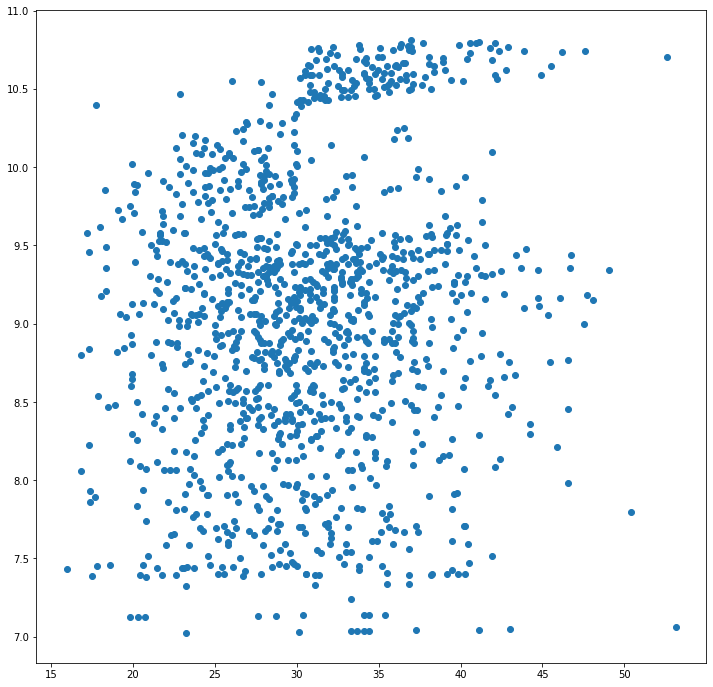

In [ ]:
# predictor bmi with y 
fig, ax = plt.subplots(figsize=(12,12))
y = updated_df['log_charges']
x2= updated_df['bmi']
ax.scatter(x2,y)
plt.show()

From the plot above, we can see that predictor age and bmi do not really have linear relationship with response variable charges.

# Model selection - Best Subset Method

In [ ]:
# Extract the transformed y variable and predictor variables from updated_df
new_df = updated_df[['age','sex','bmi','children','smoker','region','log_charges']]

In [ ]:
new_df.head()

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.90,0,yes,southwest,9.734176
1,18,male,33.77,1,no,southeast,7.453302
2,28,male,33.00,3,no,southeast,8.400538
4,32,male,28.88,0,no,northwest,8.260197
5,31,female,25.74,0,no,southeast,8.231275


In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools

##### Functions that will find the Mallow's Cp and adj-R^2 using best subset method

In [ ]:
def mallows_c(full_model, reduced_model):
    # number of parameters in the reduced model
    k = len(reduced_model.params)
    
    # number of data points
    n = len(reduced_model.fittedvalues)
    
    sse = reduced_model.mse_resid*(n - k)

    cp = (sse/full_model.mse_resid) - (n - 2*k)

    return cp

In [ ]:
def make_sm_string(df, target):
    predictors = list(df.drop([target], axis=1).columns)

    model_string = target + " ~ "
    for index, p in enumerate(predictors):
        if predictors[-1] != predictors[index]:
            model_string += p + " + "
        else:
            model_string += p
    return model_string

In [ ]:
def combo_string(combo, target):
    predictors = list(combo)

    model_string = target + " ~ "
    for index, p in enumerate(predictors):
        if predictors[-1] != predictors[index]:
            model_string += p + " + "
        else:
            model_string += p
    return model_string

In [ ]:
def best_subset(df, y):
    Y = df[y]
    X = df.drop(columns=y, axis=1)
    k = len(X.columns)
    smf_full_string = make_sm_string(df, y)
    full_model = smf.ols(smf_full_string, data=df).fit()
    num_features, feature_list, Adj_Rsq, Mallows_C, AIC, BIC  = [], [], [], [], [], []
    # Looping over k = min to k = max features in X
    for k in range(1,len(X.columns) + 1):
        # Looping over all possible combinations: from max choose k
        for combo in itertools.combinations(X.columns, k):
            smf_string = combo_string(combo, y) 
            tmp_model = smf.ols(smf_string, data=df).fit() 
            #Rsquared.append((round(tmp_model.rsquared,3)))
            Adj_Rsq.append((round(tmp_model.rsquared_adj,3)))
            Mallows_C.append((round(mallows_c(full_model, tmp_model),3)))
            feature_list.append(combo)
            num_features.append(len(combo))   
            AIC.append((round(tmp_model.aic,3)))
            BIC.append((round(tmp_model.bic,3)))
    # Store in DataFrame
    df = pd.DataFrame({'numb_features': num_features,'Mallows_C': Mallows_C, 'Adj_R^2': Adj_Rsq, 'AIC': AIC, 'BIC': BIC, 'features': feature_list})
    
    return df

In [ ]:
new_df.head()

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.90,0,yes,southwest,9.734176
1,18,male,33.77,1,no,southeast,7.453302
2,28,male,33.00,3,no,southeast,8.400538
4,32,male,28.88,0,no,northwest,8.260197
5,31,female,25.74,0,no,southeast,8.231275


In [ ]:
best_subset_df=best_subset(new_df, 'log_charges')
best_subset_df

,numb_features,Mallows_C,Adj_R^2,AIC,BIC,features
0,1,4467.431,0.305,2900.906,2911.212,"(age,)"
1,1,6986.767,-0.001,3365.853,3376.160,"(sex,)"
2,1,6832.339,0.018,3341.736,3352.042,"(bmi,)"
3,1,6759.409,0.027,3330.186,3340.492,"(children,)"
4,1,2935.485,0.490,2504.255,2514.561,"(smoker,)"
...,...,...,...,...,...,...
58,5,147.335,0.828,1117.839,1159.063,"(age, sex, bmi, smoker, region)"
59,5,88.759,0.836,1063.586,1104.811,"(age, sex, children, smoker, region)"
60,5,17.739,0.844,994.560,1035.785,"(age, bmi, children, smoker, region)"
61,5,2485.634,0.544,2367.732,2408.956,"(sex, bmi, children, smoker, region)"


In [ ]:
# Sort the resulting dataframe by using adjusted R square descending order and Mallow's Cp value ascending order
# Since we want adjusted R square to be as high as possible and Mallow's Cp value to be as low as possible.
best_subset_df.sort_values(['Adj_R^2','Mallows_C'], ascending =[0,1]).head(5)

,numb_features,Mallows_C,Adj_R^2,AIC,BIC,features
62,6,9.000,0.845,985.791,1032.168,"(age, sex, bmi, children, smoker, region)"
60,5,17.739,0.844,994.560,1035.785,"(age, bmi, children, smoker, region)"
56,5,36.335,0.842,1012.929,1043.847,"(age, sex, bmi, children, smoker)"
47,4,44.756,0.841,1021.114,1046.880,"(age, bmi, children, smoker)"
59,5,88.759,0.836,1063.586,1104.811,"(age, sex, children, smoker, region)"


### Use Ajusted R Square and Mallow's Cp to choose the candidate model pool

From the sorted sorted adjusted R square and Mallow's Cp value above, we can get the best candidate model pool contains the following three models:

1: log_charges ~ age + sex + bmi + children + smoker + region

2: charges ~ age + bmi + children + smoker + region

3: charges ~ age + sex + children + smoker 




### Use AIC and BIC value to make the final decision - chose one "best" model among the candidate pool

Both AIC and BIC measures the amount of "information lost" by a given model. So we prefer AIC/BIC score to be as low as possible. 

Among those three candidate models, the full model which is log_charges ~ age + sex + bmi + children + smoker + region has the lowest AIC and BIC score. The full model not only has the lowest AIC and BIC score, it also has the highest adjusted R square and lowest Mallow's Cp value, which are all favorable.

# Now at this step we found the "best" model. We can use will look into t test to check the significance of each predictor variable to the response variable. (Caveat: Since multiple model assumptions are violated, the model inference is not reliable anymore. But we can add explanation and state what exactly would be affected from assumption violation.

In [ ]:
model_final =smf.ols('log_charges~ age+ C(sex) + bmi+ children + C(smoker) + C(region)', data=new_df).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     874.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:39:00   Log-Likelihood:                -483.90
No. Observations:                1278   AIC:                             985.8
Df Residuals:                    1269   BIC:                             1032.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.8629      0.059    115.967      0.000       6.747       6.979
C(sex)[T.male]            -0.0653      0.020     -3.277      0.001      -0.104      -0.026
C(smoker)[T.yes]           1.6018      0.025     64.924      0.000       1.553       1.650
C(region)[T.northwest]    -0.0811      0.029     -2.835      0.005      -0.137      -0.025
C(region)[T.southeast]    -0.1612      0.029     -5.614      0.000      -0.218      -0.105
C(region)[T.southwest]    -0.1144      0.029     -4.011      0.000      -0.170      -0.058
age                        0.0356      0.001     49.786      0.000       0.034       0.037
bmi                        0.0155      0.002      9.042      0.000       0.012       0.019
children                   0.0974      0.008     11.846      0.000       0.081       0.114
==============================================================================
Omnibus:                      322.059   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1152.124
Skew:                           1.194   Prob(JB):                    6.60e-251
Kurtosis:                       6.992   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model selection with influential points included

We would like to see if there is any difference in model selection if influential points are included

In [ ]:
# Model with influential points 
data_df['log_charges']=np.log(data_df['charges'])
data_all = data_df[['age','sex','bmi','children','smoker','region','log_charges']]
data_all.head()

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.900,0,yes,southwest,9.734176
1,18,male,33.770,1,no,southeast,7.453302
2,28,male,33.000,3,no,southeast,8.400538
3,33,male,22.705,0,no,northwest,9.998092
4,32,male,28.880,0,no,northwest,8.260197


In [ ]:
model_final_all =smf.ols('log_charges~ age+ C(sex) + bmi+ children + C(smoker) + C(region)', data=data_all).fit()
model_final_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     549.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:39:00   Log-Likelihood:                -808.52
No. Observations:                1338   AIC:                             1635.
Df Residuals:                    1329   BIC:                             1682.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.0306      0.072     97.112      0.000       6.889       7.173
C(sex)[T.male]            -0.0754      0.024     -3.091      0.002      -0.123      -0.028
C(smoker)[T.yes]           1.5543      0.030     51.333      0.000       1.495       1.614
C(region)[T.northwest]    -0.0638      0.035     -1.827      0.068      -0.132       0.005
C(region)[T.southeast]    -0.1572      0.035     -4.481      0.000      -0.226      -0.088
C(region)[T.southwest]    -0.1290      0.035     -3.681      0.000      -0.198      -0.060
age                        0.0346      0.001     39.655      0.000       0.033       0.036
bmi                        0.0134      0.002      6.381      0.000       0.009       0.017
children                   0.1019      0.010     10.085      0.000       0.082       0.122
==============================================================================
Omnibus:                      463.882   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1673.760
Skew:                           1.679   Prob(JB):                         0.00
Kurtosis:                       7.330   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sm.stats.anova_lm(model_final_all, typ=2)


,sum_sq,df,F,PR(>F)
C(sex),1.885526,1.0,9.552372,2.038405e-03
C(smoker),520.123385,1.0,2635.027260,1.119863e-317
C(region),4.681567,3.0,7.905852,3.150228e-05
age,310.404346,1.0,1572.557466,1.370144e-227
bmi,8.037234,1.0,40.717897,2.423355e-10
children,20.077182,1.0,101.714177,4.241100e-23
Residual,262.328967,1329.0,NaN,NaN


In [ ]:
# Best subset chooses same model regardless of whether or not the influential points are included
best_subset_all=best_subset(data_all, 'log_charges')
best_subset_all.sort_values(['Adj_R^2','Mallows_C'], ascending =[0,1]).head(5)

,numb_features,Mallows_C,Adj_R^2,AIC,BIC,features
62,6,9.000,0.767,1635.033,1681.824,"(age, sex, bmi, children, smoker, region)"
60,5,16.552,0.765,1642.616,1684.208,"(age, bmi, children, smoker, region)"
56,5,26.718,0.763,1652.701,1683.895,"(age, sex, bmi, children, smoker)"
47,4,34.167,0.761,1660.015,1686.010,"(age, bmi, children, smoker)"
59,5,47.718,0.760,1673.412,1715.003,"(age, sex, children, smoker, region)"


# Alternative method: Spitting training and testing dataset

In [ ]:
data_df2=pd.read_csv("insurance.csv")
predictors_df=data_df2[['age','sex','bmi','children','smoker','region']]
target = data_df2['charges']

In [ ]:
# Split the data into trainig and testing set (80% training and 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors_df,target, test_size = 0.2,random_state=42)
# Build the training dataset (including response variable)
training_df = X_train.copy()
training_df['charges']=y_train.values
training_df.head()


,age,sex,bmi,children,smoker,region,charges
560,46,female,19.95,2,no,northwest,9193.83850
1285,47,female,24.32,0,no,northeast,8534.67180
1142,52,female,24.86,0,no,southeast,27117.99378
969,39,female,34.32,5,no,southeast,8596.82780
486,54,female,21.47,3,no,northwest,12475.35130


### Detect multicollinearity 

In [ ]:
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y, X = dmatrices('charges~ age+ C(sex) + bmi+ children + C(smoker) + C(region)', data=training_df, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,35.353322,Intercept
1,1.006303,C(sex)[T.male]
2,1.011703,C(smoker)[T.yes]
3,1.493159,C(region)[T.northwest]
4,1.613285,C(region)[T.southeast]
5,1.515246,C(region)[T.southwest]
6,1.023084,age
7,1.094986,bmi
8,1.005643,children


### Fit the initial model on the training dataset

In [ ]:
# Initial model on the training dataset (with full data without dropping influential points)
model_training =smf.ols('charges~ age+ C(sex) + bmi+ children + C(smoker) + C(region)', data=training_df).fit()
model_training.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.32e-305
Time:                        23:39:02   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.193e+04   1114.505    -10.705      0.000   -1.41e+04   -9744.335
C(sex)[T.male]           -18.5917    376.175     -0.049      0.961    -756.722     719.539
C(smoker)[T.yes]        2.365e+04    466.505     50.699      0.000    2.27e+04    2.46e+04
C(region)[T.northwest]  -370.6773    536.873     -0.690      0.490   -1424.130     682.776
C(region)[T.southeast]  -657.8643    539.791     -1.219      0.223   -1717.043     401.314
C(region)[T.southwest]  -809.7994    535.208     -1.513      0.131   -1859.986     240.387
age                      256.9757     13.477     19.067      0.000     230.530     283.421
bmi                      337.0926     32.471     10.381      0.000     273.378     400.807
children                 425.2788    154.655      2.750      0.006     121.814     728.743
==============================================================================
Omnibus:                      252.330   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.798
Skew:                           1.253   Prob(JB):                    5.19e-134
Kurtosis:                       5.737   Cond. No.                         310.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Detect influential points on the training dataset using externally studentized residuals and Cook's distance

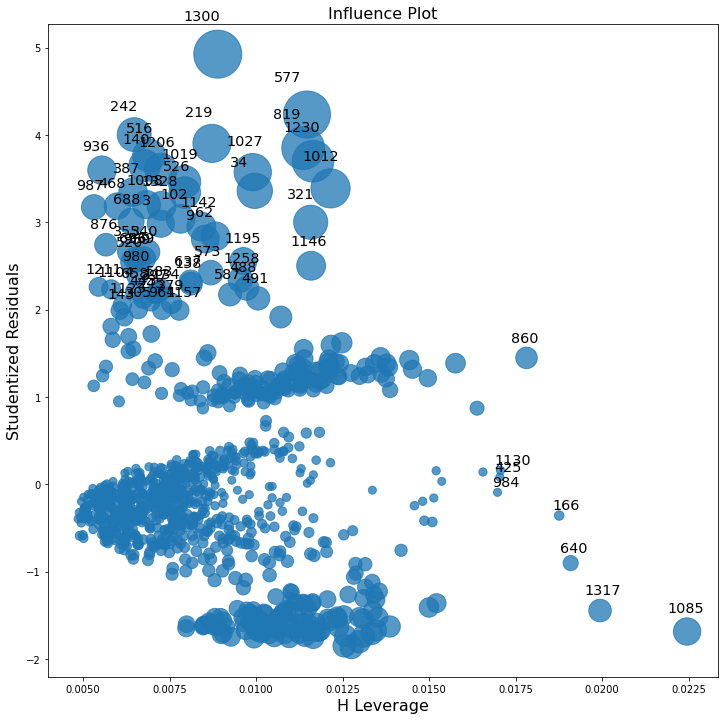

In [ ]:
# Use cook's distance to detect influential points in the training dataset
fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(model_training,ax=ax, criterion="cooks")

In [ ]:
# Calculate the external studentized residuals 
infl2 = model_training.get_influence()
ext_stu_residuals = infl2.resid_studentized_external

import scipy 
n= len(training_df)
p = 9 # We have 9 parameters 

# Threshold value for externally studentized residual
seuil_stud = scipy.stats.t.ppf(0.975, df= n-p-1)

# Identify the potentialinfluential points 
influential= np.abs(ext_stu_residuals) > seuil_stud 

training_df["Original_residuals"] = model_training.resid
training_df["Externally_studentized_residuals"] = infl2.resid_studentized_external

# Get the datapoints whose might be influential points (filter on the original dataframe)
influential_df=training_df[influential]

# Get the obeservation numbers. externally studentized residual values and original residual values from the fitteed model of the influential points

print(f'There are {len(influential_df)} influential points detected by Externally studentied Residuals')

influential_df[['Externally_studentized_residuals','Original_residuals']].head()

There are 58 influential points detected by Externally studentied Residuals


,Externally_studentized_residuals,Original_residuals
1142,2.952975,17964.219582
140,3.650872,22180.368942
526,3.342724,20316.819425
987,3.175198,19333.976082
583,2.229463,13594.582633


In [ ]:
inflsum = infl2.summary_frame()
reg_cook = inflsum.cooks_d
# Identify the points that might be influential according to Cook's distance 
influential_cook = np.abs(reg_cook) >= 4/n
# Add the cooks distance for all the data points in the original dataframe
training_df["Cook's distance"]=reg_cook
# Filter the dataframe to show the potential influential points according to Cook's distance
influential_cook_df=training_df[influential_cook]
print(f'There are {len(influential_cook_df)} influential points detected by Externally studentied Residuals')
influential_cook_df[["Cook's distance"]].head()

There are 63 influential points detected by Externally studentied Residuals


,Cook's distance
1142,0.008167
140,0.009997
380,0.004246
526,0.009843
987,0.005936


In [ ]:
# Get the influential list identified by both externally studentized residuals  and Cook's distance  

# Indexes of influential points based on externally studentized residuals 
influ_index_1=set(influential_df.index)
# Indexes of influential points based on Cook's distance  
influ_index_2=set(influential_cook_df.index)
# Get the intersection of two lists from above, which is our list of influential points detected
final_influ_point_list =list(influ_index_1.intersection(influ_index_2))
len(final_influ_point_list)

47

In [ ]:
# Drop the 47 influential points identified from the original dataset
removed_influ_df = data_df.drop(final_influ_point_list)
removed_influ_df.head()

,age,sex,bmi,children,smoker,region,charges,Original_residuals,Externally_studentized_residuals,Cook's distance,log_charges
0,19,female,27.90,0,yes,southwest,16884.9240,-8408.789028,-1.394131,2.036061e-03,9.734176
1,18,male,33.77,1,no,southeast,1725.5523,-1723.050534,-0.284917,4.975373e-05,7.453302
2,28,male,33.00,3,no,southeast,4449.4620,-2257.526491,-0.373452,9.785460e-05,8.400538
4,32,male,28.88,0,no,northwest,3866.8552,-1725.638186,-0.285261,4.455743e-05,8.260197
5,31,female,25.74,0,no,southeast,3756.6216,36.795801,0.006085,2.327392e-08,8.231275


### Detect heteroscedasticity on the training dataset using fitted value vs residuals plot and BP test

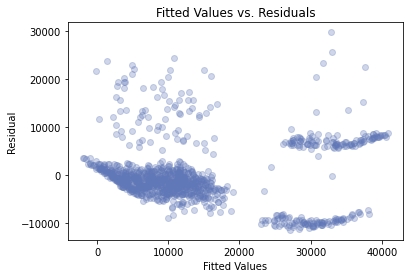

In [ ]:
# Detect heteroscedasticity using fitted value vs residuals plot
p = model_training.fittedvalues
res = model_training.resid
plt.scatter(p,res,color='#6178b8',alpha=0.3)
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.title('Fitted Values vs. Residuals')
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2, color='grey')

In [ ]:
# Breusch-Pagan for heteroscedasticity (numeric method )
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model_training.resid, model_training.model.exog)   # exog: the regressors, Xs in the model. 
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 93.34462547584026, 'LM-Test p-value': 9.72076515318996e-17}
